In [1]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd

The data is taken from [this](https://www.kaggle.com/wordsforthewise/lending-club) repository, which sorts the loans by accepted or rejected, and provides information about loans up to Q4 2018.

In [2]:
lc_data = pd.read_csv("./accepted_2007_to_2018Q4.csv", low_memory=False)
lc = lc_data.copy(deep=True)

In [3]:
lc.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260700,Total amount funded in policy code 2: 521953170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note that the last two rows of this dataset should be discarded.

In [3]:
lc.drop(lc.tail(2).index, inplace=True)

In [11]:
pd.set_option('display.max_columns', None)
lc.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

From the first five rows, we can see that there are many features with missing data, as well as many categorical features. We anticipate at least some of them to be important, in particular the "subgrade" (ordinal) and "title" (nominal) features, the former dividing the grade into finer categories and the latter being the motivation behind the borrower. At the same time, there are categories such as "url", "id", "member_id", and "emp_title" (employment title) which can be discarded. Since this dataset is specifically of loans which were fully funded by investors, "funded_amnt_inv" and "funded_amnt" should be redundant with loan_amnt. Finally, any loan that has [policy_code=2](https://www.lendacademy.com/policy-code-2-loans-lending-club/) should be discarded because they are not publicly available.

In [9]:
ls_description = pd.read_excel("./LCDataDictionary.xlsx").dropna()
ls_description.style.set_properties(subset=['Description'], **{'width': '1000px'})

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


We list the percentage of missing data in each feature, following Pragyan Subedi:

In [3]:
def null_values(lc, return_table=True):
    mis_val = lc.isnull().sum()
    mis_val_percent = 100 * mis_val / len(lc)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(4)
    print("There are", len(lc.columns), "columns in total.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
    if return_table:
        return mis_val_table_ren_columns

In [7]:
miss_values = null_values(lc)
pd.set_option('display.max_rows', None)
miss_values

There are 150 columns that have missing values.


,Missing Values,% of Total Values
member_id,2260699,100.0000
orig_projected_additional_accrued_interest,2252048,99.6173
hardship_dpd,2249782,99.5171
hardship_status,2249782,99.5171
deferral_term,2249782,99.5171
hardship_amount,2249782,99.5171
hardship_start_date,2249782,99.5171
hardship_end_date,2249782,99.5171
payment_plan_start_date,2249782,99.5171
hardship_length,2249782,99.5171


In [4]:
lc.isnull().any()

id                       False
member_id                 True
loan_amnt                 True
funded_amnt               True
funded_amnt_inv           True
                         ...  
settlement_status         True
settlement_date           True
settlement_amount         True
settlement_percentage     True
settlement_term           True
Length: 151, dtype: bool

Missing values are in every feature except for ID, with the minimum being 31. Because there are so many features with 31 missing data points, we will have to remove these 31 rows. There are also many features with over 90% of the data missing, so it is likely that we will eventually need to drop these as well.

In [5]:
lc.dropna(how='any', subset=['loan_status'], inplace=True)
null_values(lc, return_table=False)

There are 151 columns in total.
There are 113 columns that have missing values.


## Loan default predictions

A classic problem that any institution offering loans seeks to solve is how to minimize losses by minimizing the amount of loans offered that eventually default. Our target variable is therefore loan_status (42 in the dictionary), and we are seeking those that have gone into default or are charged-off. We treat these two in the same way because we assume that every loan that has been charged-off also went into default.

A first try at this problem is to keep all of the features that possibly could have some importance, including those features that are not known at the time of offering.

In [9]:
lc['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

We see above that there are three categories that fit this criteria. We will have to make sure that all three categories in target_list are the same. According to [Fred93 (2014)](https://forum.lendacademy.com/?topic=2427.msg20813#msg20813), the exact explanation for the "does not meet the credit policy" categories is unclear, but we find it reasonable to treat them the same way as the regular categories. For simplicity, we treat delinquent loans late by <120 days in the same manner as those that are current or are fully paid off. Later on, the loan status will be treated ordinally.

In [24]:
target_categories = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off']
target_list = [1 if i in target_categories else 0 for i in lc['loan_status']]
lc.drop('loan_status', axis=1, inplace=True)
lc['target'] = target_list
lc['target'].value_counts()

0    1991308
1     269360
Name: target, dtype: int64

The target is a bit unbalanced, with only about 12% of loans in default.

### Preliminary data visualization

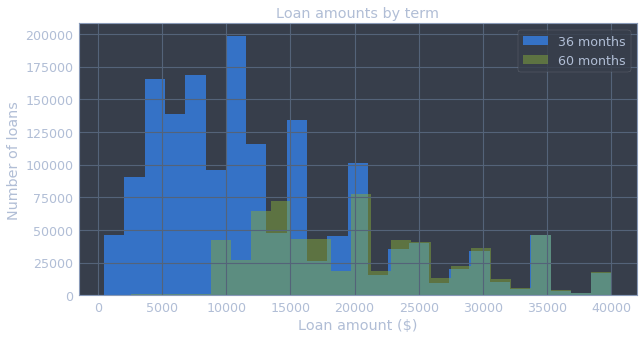

In [125]:
fig = plt.figure(figsize=(10, 5))
plt.hist(lc.loc[lc['term'] == ' 36 months', 'loan_amnt'], label='36 months', bins=25, alpha=1.0)
plt.hist(lc.loc[lc['term'] == ' 60 months', 'loan_amnt'], label='60 months', bins=25, alpha=0.5)
plt.title("Loan amounts by term")
plt.xlabel("Loan amount ($)")
plt.ylabel("Number of loans")
plt.legend();

Generally speaking, the loan amounts are around 5k to 20k, with spikes at 35k and 40k, and not exceeding 40k. Intuitively, the 60 month loans tended to be of higher amount than the 36 month loans.

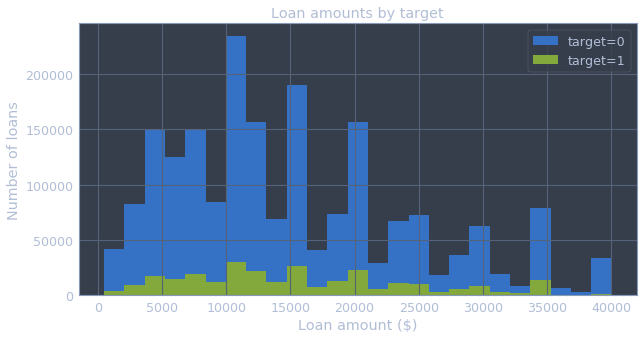

In [124]:
fig = plt.figure(figsize=(10, 5))
plt.hist(lc.loc[lc['target'] == 0, 'loan_amnt'], label='target=0', bins=25, alpha=1.0)
plt.hist(lc.loc[lc['target'] == 1, 'loan_amnt'], label='target=1', bins=25, alpha=1.0)
plt.title("Loan amounts by target")
plt.xlabel("Loan amount ($)")
plt.ylabel("Number of loans")
plt.legend();

Unsurprisingly, most loans possess grades of A, B, or C, with a sizable amount of D loans. 

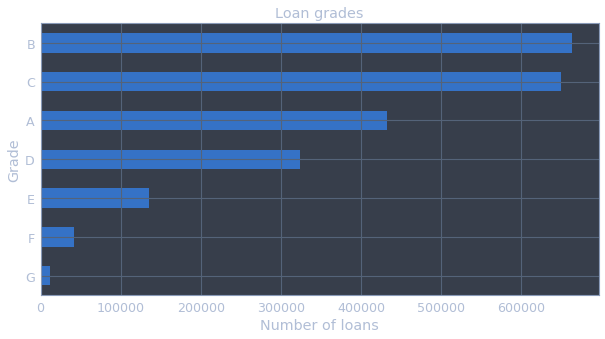

In [25]:
lc['grade'].value_counts().sort_values().plot.barh(figsize=(10, 5))
plt.title("Loan grades")
plt.xlabel("Number of loans")
plt.ylabel("Grade");

Note the logarithmic scale. There are many loans which are current. This includes those in the "Current" category, as well as delinquent loans not in default/charged-off. The graph below also illustrates the importance of including "Charged Off" as part of the bad loans classification, since the number of loans currently in default is below 100, which is 4 orders of magnitude less than the size of the entire dataset.

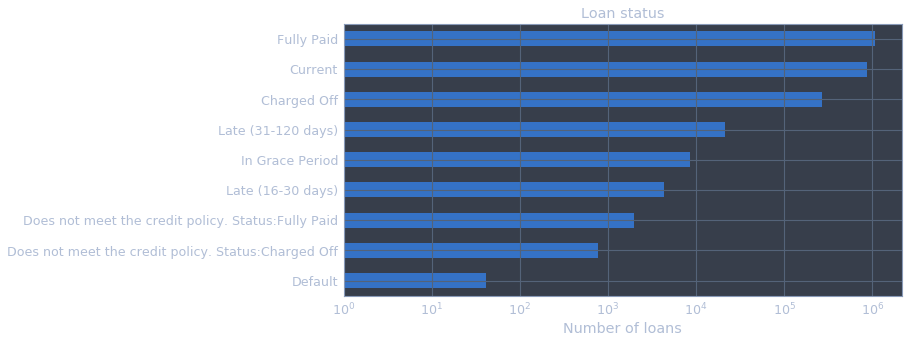

In [9]:
lc['loan_status'].value_counts().sort_values().plot.barh(figsize=(10, 5), log=True)
plt.title("Loan status")
plt.xlabel("Number of loans");

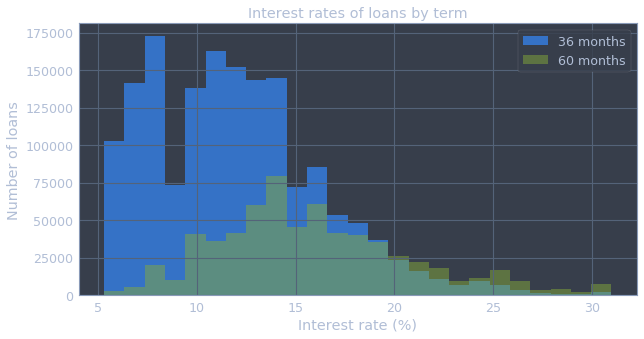

In [128]:
fig = plt.figure(figsize=(10, 5))
plt.hist(lc.loc[lc['term'] == ' 36 months', 'int_rate'], label='36 months', bins=25, alpha=1.0)
plt.hist(lc.loc[lc['term'] == ' 60 months', 'int_rate'], label='60 months', bins=25, alpha=0.5)
plt.title("Interest rates of loans by term")
plt.xlabel("Interest rate (%)")
plt.ylabel("Number of loans")
plt.legend();

The majority of the loans have interest rates around 5-20%, with a chart that is skewed right. We also notice that interest rates of loans that default tend to be slightly higher than loans that do not, which should make sense.

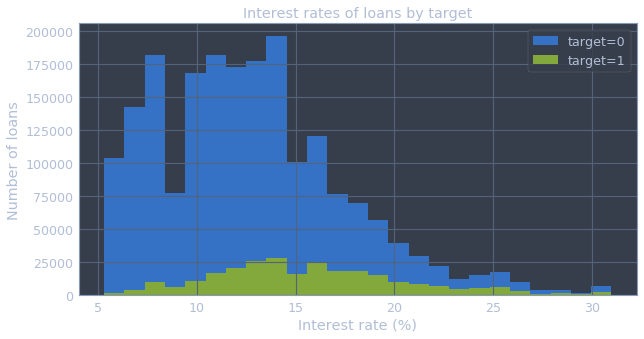

In [130]:
fig = plt.figure(figsize=(10, 5))
plt.hist(lc.loc[lc['target'] == 0, 'int_rate'], label='target=0', bins=25, alpha=1.0)
plt.hist(lc.loc[lc['target'] == 1, 'int_rate'], label='target=1', bins=25, alpha=1.0)
plt.title("Interest rates of loans by target")
plt.xlabel("Interest rate (%)")
plt.ylabel("Number of loans")
plt.legend();

In [77]:
print("Initial FICO range cutoff: ", lc['fico_range_low'].min())
print("Last FICO range minimum: ", lc['last_fico_range_high'].min())
lastficohigh_below300 = [i for i in lc['last_fico_range_high'] if i < 300]
lastficolow_below300  = [i for i in lc['last_fico_range_low'] if i < 300]
print(len(lastficohigh_below300), ", ", len(lastficolow_below300))

Initial FICO range cutoff:  610.0
Last FICO range minimum:  0.0
235 ,  37326


We see that prior to being issued the loan, almost all borrowers have the high range of the FICO credit scores above 620 (in fact, the cutoff is 660), though some of their last recorded FICO scores fell below 620, or the threshold to be considered subprime. This point is also illustrated by the two histograms on the left. We expect a Gaussian distribution for FICO scores, and while the right end gradually falls off, the left falls off much sharper.

The FICO credit score range is (300, 850). Those entries that are below 300 in the "last_fico_range_high" and "last_fico_range_low" categories should be noted.

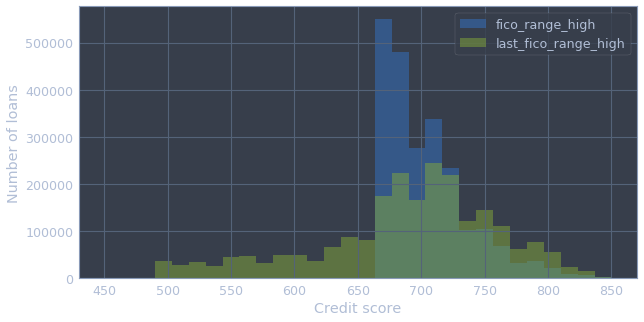

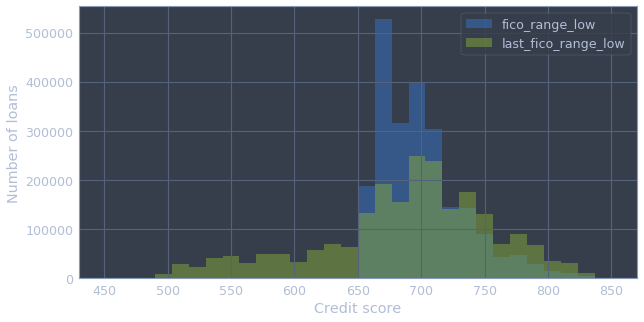

In [86]:
lc[['fico_range_high', 'last_fico_range_high']].plot.hist(range=[450,850], bins=30, alpha=0.5, figsize=(10, 5))
plt.xlabel("Credit score")
plt.ylabel("Number of loans")
lc[['fico_range_low', 'last_fico_range_low']].plot.hist(range=[450,850], bins=30, alpha=0.5, figsize=(10, 5))
plt.xlabel("Credit score")
plt.ylabel("Number of loans");

There are two things to keep in mind with employment years: missing values (6.5% missing), and the fact that the relatively high amount of borrowers with employment of 10+ years is reflected in the fact that every borrower with such an employment history is put into one category. In fact, we see that given the bottom several bars, the trend is that those who have been employed longer are slightly less likely to obtain a loan. In contrast, there are more loans issued to those with 3 or less years of employment. There are many more borrowers with <10 years of employment than those with >10 years.

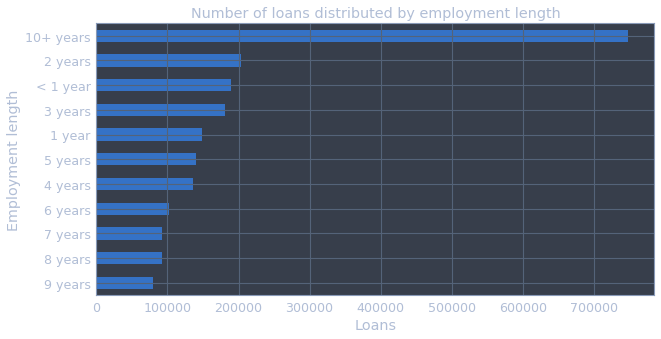

In [136]:
lc['emp_length'].value_counts().sort_values().plot.barh(figsize=(10, 5))
plt.title("Number of loans distributed by employment length")
plt.xlabel("Loans")
plt.ylabel("Employment length");

Next, we look at annual income. As expected, the distribution skews to the right. There are also quite a number of outliers. For example, the maximum income of 1.1e8 is almost certainly not real. In fact, any unverified seven figure income is suspect. This is a major reason why we use median instead of mean for income.

In [173]:
print("Maximum income:", lc['annual_inc'].max())
seven_figures = [i for i in lc['annual_inc'] if i > 1e6]
print(len(seven_figures), "entries with seven figure incomes.")
median_income_target0 = lc.loc[lc['target'] == 0, 'annual_inc'].median()
median_income_target1 = lc.loc[lc['target'] == 1, 'annual_inc'].median()
print("Median income for nondefault loans:", median_income_target0)
print("Median income for loans in default:", median_income_target1)

Maximum income: 110000000.0
583 entries with seven figure incomes.
Median income for nondefault loans: 65200.0
Median income for loans in default: 60000.0


We see that the median income of borrowers whose loans are in default is only slightly lower than the other borrowers. However, we also see that most borrowers with more than \\$150k in annual income have good loans.

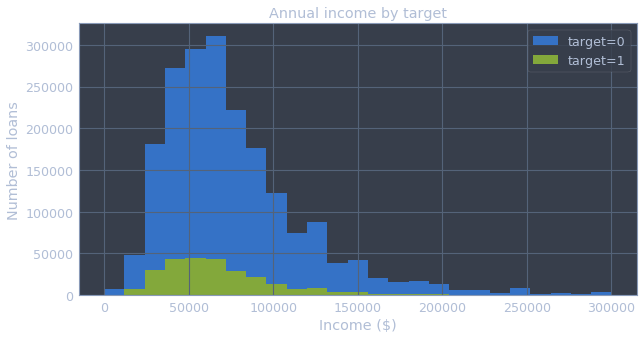

In [169]:
fig = plt.figure(figsize=(10, 5))
plt.hist(lc.loc[lc['target'] == 0, 'annual_inc'], range=[0, 3e5], label='target=0', bins=25, alpha=1.0)
plt.hist(lc.loc[lc['target'] == 1, 'annual_inc'], range=[0, 3e5], label='target=1', bins=25, alpha=1.0)
plt.title("Annual income by target")
plt.xlabel("Income ($)")
plt.ylabel("Number of loans")
plt.legend();

According to the dictionary, the debt-to-income (DTI) ratio is calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

The overwhelming majority of borrowers have DTIs between 0-40, so we see that there are outliers. We suspect that the maximum of 999, for example, is an artificial cutoff and not an actual ratio. The median DTI for defaulted loans is slightly higher than good loans, which is to be expected from our experiences (e.g. credit scores decrease when one's credit utilization ratio for credit cards is high, indicating risk that the borrower cannot pay in the future). We choose median instead of mean for DTI because the ratio is calculated using monthly income, and income is typically averaged using the median.

In [172]:
print("Maximum DTI:", lc['dti'].max())
dti_above100 = [i for i in lc['dti'] if i > 100]
print(len(dti_above100), "entries with DTI > 100.")
median_dti_target0 = lc.loc[lc['target'] == 0, 'dti'].median()
median_dti_target1 = lc.loc[lc['target'] == 1, 'dti'].median()
print("Median DTI for nondefault loans:", median_dti_target0)
print("Median DTI for loans in default:", median_dti_target1)

Maximum DTI: 999.0
2561 entries with DTI > 100.
Median DTI for nondefault loans: 17.58
Median DTI for loans in default: 19.75


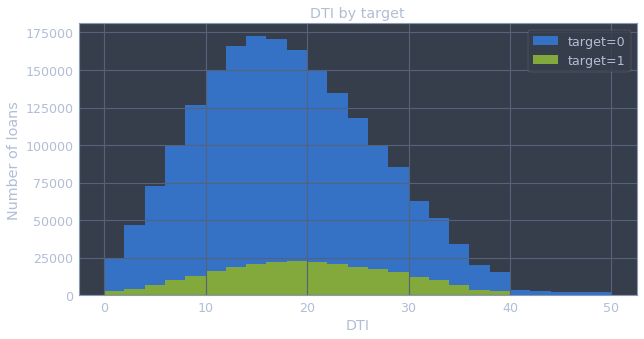

In [153]:
fig = plt.figure(figsize=(10, 5))
plt.hist(lc.loc[lc['target'] == 0, 'dti'], label='target=0', range=[0, 50], bins=25, alpha=1.0)
plt.hist(lc.loc[lc['target'] == 1, 'dti'], label='target=1', range=[0, 50], bins=25, alpha=1.0)
plt.title("DTI by target")
plt.xlabel("DTI")
plt.ylabel("Number of loans")
plt.legend();

The loan application also has the choice of a single or joint type. Joint makes up 5.74% of good loans but only 2.36% of defaulted loans.

In [180]:
lc.loc[lc['target'] == 0, 'application_type'].value_counts()

Individual    1876948
Joint App      114360
Name: application_type, dtype: int64

In [178]:
lc.loc[lc['target'] == 1, 'application_type'].value_counts()

Individual    263010
Joint App       6350
Name: application_type, dtype: int64

### Data cleaning

For convenience, we will rewrite the code that deleted rows very early on, as well as the target column. We will remove every feature with over 60% missing data.

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [5]:
# CONVENIENCE CELL, ONLY RUN ONCE
lc.drop(lc.tail(2).index, inplace=True)
lc.dropna(how='any', subset=['loan_status'], inplace=True)

target_categories = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off']
target_list = [1 if i in target_categories else 0 for i in lc['loan_status']]
lc.drop('loan_status', axis=1, inplace=True)
lc['target'] = target_list
lc['target'].value_counts()

0    1991308
1     269360
Name: target, dtype: int64

In [6]:
lc.dropna(axis=1, thresh=int(len(lc)*0.4), inplace=True)
useless_redundant = ['id', 'funded_amnt', 'funded_amnt_inv', 'emp_title', 
                     'title', 'zip_code', 'addr_state', 'url']
lc.drop(useless_redundant, axis=1, inplace=True)

We drop "policy_code" because there are no loans with policy_code=2. We drop "next_pymnt_d" because it is only relevant for current loans and its value, if applicable, is tightly correlated with "last_pymnt_d" (it is simply one or two months ahead).

In [7]:
lc.loc[lc['policy_code'] == 2, 'loan_amnt'] # empty list
lc.drop(['policy_code'], axis=1, inplace=True)
lc.drop(['next_pymnt_d'], axis=1, inplace=True)

In [10]:
corr = lc.corr()['target'].sort_values()
print('Most Positive Correlations:\n', corr.tail(10))
print('\nMost Negative Correlations:\n', corr.head(10))

Most Positive Correlations:
 percent_bc_gt_75           0.076372
open_rv_24m                0.078947
num_tl_op_past_12m         0.083083
inq_last_6mths             0.088036
acc_open_past_24mths       0.093182
total_rec_late_fee         0.096626
int_rate                   0.199021
collection_recovery_fee    0.496912
recoveries                 0.522882
target                     1.000000
Name: target, dtype: float64

Most Negative Correlations:
 last_fico_range_high   -0.600232
last_fico_range_low    -0.557006
total_rec_prncp        -0.226373
out_prncp              -0.210632
out_prncp_inv          -0.210612
last_pymnt_amnt        -0.180731
total_pymnt_inv        -0.141276
total_pymnt            -0.141199
fico_range_low         -0.119848
fico_range_high        -0.119847
Name: target, dtype: float64


We see that the most positively correlated variables are expected ones like "int_rate", but also "recoveries" and "total_rec_late_fee", showing that those borrowers with delinquent fees are at higher risk of default. We also see that the most negatively correlated variables, by far, are the last FICO credit scores. These are "postdicting" variables which cannot be known at the time of offering, but we keep them for now. 

In [6]:
lc.select_dtypes('object').apply(pd.Series.nunique, axis=0)

term                      2
grade                     7
sub_grade                35
emp_length               11
home_ownership            6
verification_status       3
issue_d                 139
pymnt_plan                2
purpose                  14
addr_state               51
earliest_cr_line        754
initial_list_status       2
last_pymnt_d            136
last_credit_pull_d      141
application_type          2
hardship_flag             2
disbursement_method       2
debt_settlement_flag      2
dtype: int64

Now that we have the obvious features out of the way, we see that each of the features with object types will have a different operation applied to them, the most common of which will either be a direct conversion, LabelBinarizer, OrdinalEncoding, OneHotEncoding, or simply dropping them entirely. Let us list the categorical preprocessing treatment that will be necessary for each of these.

1. "term": LabelEncoder. Can either be 36 or 60 months. 
2. "grade": OrdinalEncoding. A-G grade loans correspond to 0-6.
3. "subgrade": OrdinalEncoding.
4. "emp_length": OrdinalEncoding. Ordered from <1, 1-9, to 10+, corresponding to 0-10.
5. "home_ownership": OneHotEncoding (6). Ordinal was considered because there is some degree of ordering when it comes to owning vs. mortgage vs. rent, but the categories of "any" and "other" would be difficult to order.
6. "verification_status": LabelEncoder. Note that there are 3 possible categories for this feature; "Source Verified" and "Verified" should be treated the same way, so this feature must be treated separately from other features that need the LabelEncoder.
7. "issue_d": direct conversion. Dates should be converted to float64 in units of years.
8. "pymnt_plan: LabelEncoder. Can either be y or n.
9. "purpose": OneHotEncoding (14). This is the nonredundant loan reason feature.
10. "earliest_cr_line": direct conversion.
11. "initial_list_status": LabelEncoder.
12. "last_pymnt_d": direct conversion.
13. "last_credit_pull_d": direct conversion.
14. "application_type": LabelEncoder. Can either be "Individual" or "Joint App".
15. "hardship_flag": LabelEncoder. Can either be "N" or "Y".
16. "disbursement_method": LabelEncoder.
17. "debt_settlement_flag": LabelEncoder. can either be "N" or "Y".

In [8]:
miss_values = null_values(lc, return_table=True)
pd.set_option('display.max_rows', None)
miss_values

There are 99 columns in total.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
mths_since_last_delinq,1158502,51.2460
il_util,1068850,47.2803
mths_since_rcnt_il,909924,40.2502
all_util,866348,38.3227
open_acc_6m,866130,38.3130
inq_last_12m,866130,38.3130
total_cu_tl,866130,38.3130
max_bal_bc,866129,38.3130
open_act_il,866129,38.3130
total_bal_il,866129,38.3130


There are many features with missing data, some worse than others. For example, there are many features with less than 15% missing, which can be dealt with in a relatively straightforward manner. However, 16 features have more than 38% of their data missing.



To easily see the effects of our preprocessing, we first work with the first 25 rows of the entire dataset.

In [9]:
lc_first25 = lc.head(25)

In [14]:
pd.set_option('display.max_columns', None)
lc_first25

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,issue_d,pymnt_plan,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,target,0,1,2,3,4,5,6,7,8
0,3600.0,0,13.99,123.03,2,2.6,10,55000.0,0,2015.916667,0,5.91,0.0,2003.583333,675.0,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,1,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.000,2019.000000,122.67,2019.166667,564.0,560.0,0.0,0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,24700.0,0,11.99,820.28,2,2.0,10,65000.0,0,2015.916667,0,16.06,1.0,1999.916667,715.0,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,1,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.000,2016.416667,926.35,2019.166667,699.0,695.0,0.0,0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,20000.0,1,10.78,432.66,1,1.6,10,63000.0,0,2015.916667,0,10.78,0.0,2000.583333,695.0,699.0,0.0,NaN,6.0,0.0,7869.0,56.2,18.0,1,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.000,2017.416667,15813.30,2019.166667,704.0,700.0,0.0,1,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,35000.0,1,14.85,829.90,2,2.8,10,110000.0,1,2015.916667,0,17.06,0.0,2008.666667,785.0,789.0,0.0,NaN,13.0,0.0,7802.0,11.6,17.0,1,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.000,2019.083333,829.90,2019.166667,679.0,675.0,0.0,0,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,10400.0,1,22.45,289.91,5,5.0,3,104433.0,1,2015.916667,0,25.37,1.0,1998.416667,695.0,699.0,3.0,12.0,12.0,0.0,21929.0,64.5,35.0,1,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.000,2016.500000,10128.96,2018.166667,704.0,700.0,0.0,0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210

In [11]:
pd.options.mode.chained_assignment = None
def convert_datetofloat(lc, feature):
        lc[feature] = pd.to_datetime(lc[feature]).apply(
            lambda x: float(x.strftime('%Y')) + 1/12 * (float(x.strftime('%m')) - 1) )
    
features_datetofloat = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
for feature in features_datetofloat:
    convert_datetofloat(lc_first25, feature)

In [12]:
labelenc = LabelEncoder()
def convert_labelenc(lc, feature):
    lc[feature] = labelenc.fit_transform(lc[feature])

features_labelenc = ['term', 'pymnt_plan', 'initial_list_status', 'application_type', 
                     'hardship_flag', 'disbursement_method', 'debt_settlement_flag']
for feature in features_labelenc:
    convert_labelenc(lc_first25, feature)
    
# Because there are no missing values in this feature, we can use a ternary operator
def convert_verification_status(lc):
    for i in lc.index:
        lc.loc[i, 'verification_status'] = 0 if lc.loc[i, 'verification_status'] == 'Not Verified' else 1
            
convert_verification_status(lc_first25)

def convert_grade(lc):
    for i in lc.index:
        lc.loc[i, 'grade'] = ord(lc.loc[i, 'grade']) - 65

convert_grade(lc_first25)

# Interpolates values of the subgrade for consistency with the grade feature
def convert_subgrade(lc):
    for i in lc.index:
        lc.loc[i, 'sub_grade'] = (lc.loc[i, 'grade'] + 
            1/5 * (float(''.join(filter(str.isdigit, lc.loc[i, 'sub_grade']))) - 1) )
    lc['sub_grade'] = pd.to_numeric(lc['sub_grade'])

convert_subgrade(lc_first25)

def convert_employment(lc):
    for i in lc.index:
        if lc.loc[i, 'emp_length'] == '< 1 year':
            lc.loc[i, 'emp_length'] = 0
        elif lc.loc[i, 'emp_length'] == lc.loc[i, 'emp_length']:
            lc.loc[i, 'emp_length'] = float(''.join(filter(str.isdigit, lc.loc[i, 'emp_length'])))
    lc['emp_length'] = pd.to_numeric(lc['emp_length'])
    
convert_employment(lc_first25)

In [13]:
onehot = OneHotEncoder()
cat_onehot = lc_first25[['purpose', 'home_ownership']]
mtx_onehot = onehot.fit_transform(cat_onehot).toarray()
df_onehot = pd.DataFrame(mtx_onehot)
lc_first25.drop(['purpose', 'home_ownership'], axis=1, inplace=True)
lc_first25 = pd.concat([lc_first25, df_onehot], axis=1)

In [15]:
lc_first25.select_dtypes('object').apply(pd.Series.nunique, axis=0)

Series([], dtype: float64)

We reason that missing values (51.25%) in the feature "mths_since_last_delinq" refer to borrowers who have never had delinquencies on their accounts. To impute, we calculate the difference between the last payment date and the earliest line of credit. We believe this is reasonable because of three reasons: first, the maximum value in this feature is 226, or about 19 years, which we believe is a reasonable maximum number; second, the distribution of this feature is heavily skewed towards the lower end; and third, a shorter credit history has generally been a detracting factor in the calculation of one's FICO score.

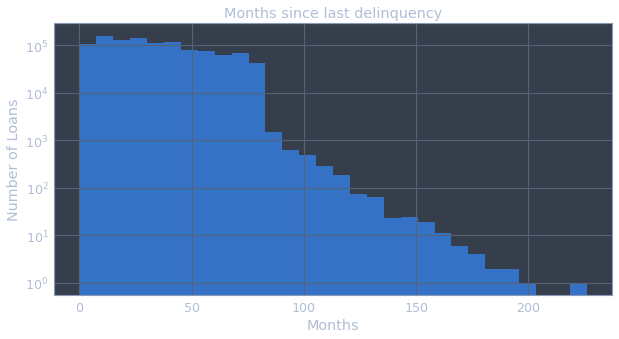

In [32]:
lc['mths_since_last_delinq'].plot.hist(bins=30, alpha=1, figsize=(10, 5), log=True)
plt.title("Months since last delinquency")
plt.xlabel("Months")
plt.ylabel("Number of Loans");

In [64]:
from sklearn.pipeline import Pipeline

AttributeError: 'Series' object has no attribute 'to_datetime'

## Loan default predictions ― a more realistic analysis

To better simulate the information that is available to LendingClub and investors, we drop all features that are not known at the time of offering. For example, the last FICO scores are not known at the initial time. Loans which are currently being issued are particularly problematic because the dataset is being taken at one particular snapshot in time. The test set would ideally consist of all current loans, but this is only suitable if we revisit our model after 60 months (or 36 months if we only use those loans). 

## Portfolio optimization

As a peer-to-peer lending platform, LendingClub loans are funded by investors. A central goal of any investor is how to optimize their portfolio for maximum returns. Unlike predicting loan defaults, this problem is complicated by a number of factors, including but not limited to:

1. From a probabilistic perspective, a loan can default at any time in the payment schedule, at a partial loss for the investor.
2. The investor can only make a decision on whether to invest in a loan at the initial time, and therefore the investor does not have access to all features in this dataset. Once an investment is made, it must either mature to the loan expiration date (36 or 60 months after issuance), or at least part of it will be lost due to default. This has some similarities to investing in derivative securities, although there is no hedging strategy that an investor can create to protect themselves from loan defaults.
3. Interest rates vary with time, but the investor only has access to loans of different grades.
4. The minimum investment in a single loan is \\$25, but the weights assigned to each loan will be continuous. This discretization matters more the smaller the portfolio.
5. To date, LendingClub no longer offers loans that are of E grade or riskier. The loans of these grades in the dataset cannot be taken into account in the decision of the investor today. For our purposes, we will do the same on the most recent loans that were fully paid off or went into default.
6. There are loans in the dataset that are still in issuance. The earlier they were issued, the more uncertainty there is to whether the borrower will continue to follow the repayment schedule. According to LendingClub statistics, there are a significant number of current loans whose current payment is late that eventually go into default.
7. There are additional complications to the normal payment schedule, the most common being delinquency.
8. When one invests in actual loans on LendingClub at a given time, there are a limited amount of loans at that time to invest in. In our analysis, this point will likely be ignored at first. We may take this into account later ― it will amplify the effects of discretization (cf. point 4).
9. The performance will primarily be measured through the difference between the theoretical (if every borrower follows their normal payment schedules, with no delinquencies) and actual returns, the latter of which will also depend on macroeconomic indicators such as CPI.

The performance of an actual portfolio is, of course, subject to many more variables outside of the control of the investor, the most significant of which would be the general economic conditions of the US.